# Exploratory Analysis: Ubuntu-Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("datawarehouse/processed-ubuntu-packages.csv")

Brief look at the data

In [2]:
print(df.head())
print(df.shape)

   Distro-Version  Distro-Year       Package  Description Section  \
0  18.04 - bionic         2018          acct  Description   admin   
1  18.04 - bionic         2018           acl  Description   utils   
2  18.04 - bionic         2018  acpi-support  Description   admin   
3  18.04 - bionic         2018         acpid  Description   admin   
4  18.04 - bionic         2018       adduser  Description   admin   

             Version Architecture   Priority Essential Build-Essential  ...  \
0            6.6.4-1        amd64   optional        no              no  ...   
1     2.2.52-3build1        amd64   optional        no              no  ...   
2              0.142        amd64   optional        no              no  ...   
3  1:2.0.28-1ubuntu1        amd64   optional        no              no  ...   
4       3.116ubuntu1          all  important        no             yes  ...   

  Original-Maintainer      Size  Installed-Size  \
0              Debian   87216.0           297.0   
1       

In [3]:
print(df.describe())

        Distro-Year          Size  Installed-Size
count  299728.00000  2.997280e+05    2.997280e+05
mean     2020.40019  2.799956e+06    1.036722e+04
std         1.67108  1.717811e+07    8.584265e+04
min      2018.00000  7.340000e+02    2.000000e+00
25%      2018.00000  1.390600e+04    6.600000e+01
50%      2020.00000  6.090400e+04    2.870000e+02
75%      2022.00000  5.443205e+05    2.361000e+03
max      2022.00000  2.873482e+09    1.388204e+07


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299728 entries, 0 to 299727
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Distro-Version       299728 non-null  object 
 1   Distro-Year          299728 non-null  int64  
 2   Package              299728 non-null  object 
 3   Description          299728 non-null  object 
 4   Section              299728 non-null  object 
 5   Version              299727 non-null  object 
 6   Architecture         299728 non-null  object 
 7   Priority             299728 non-null  object 
 8   Essential            299728 non-null  object 
 9   Build-Essential      299728 non-null  object 
 10  Maintainer           299728 non-null  object 
 11  Original-Maintainer  299728 non-null  object 
 12  Size                 299728 non-null  float64
 13  Installed-Size       299728 non-null  float64
 14  Depends              299728 non-null  object 
 15  Pre-Depends      

## Frequency and Trends

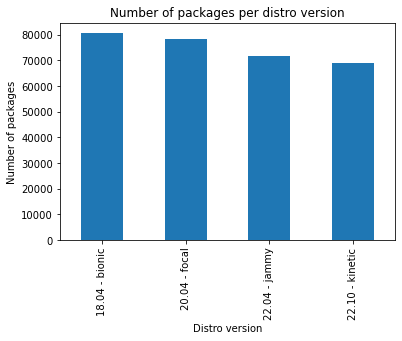

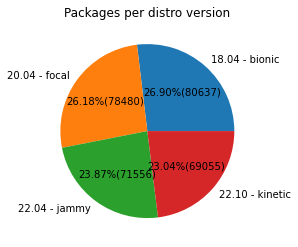

In [10]:
# Number of packages per distro version
pckg_count = df['Distro-Version'].value_counts()
pckg_count.plot(kind='bar')
plt.title('Number of packages per distro version')
plt.xlabel('Distro version')
plt.ylabel('Number of packages')

# Pie chart of packages per distro version
plt.figure()
plt.pie(pckg_count, labels=pckg_count.index, autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*pckg_count.sum()))
plt.title('Packages per distro version')
plt.show()

Most common values

Most common maintainers for each distro version
Bionic: 
 Ubuntu       71412
Canonical     7127
Debian         495
Language       340
Kubuntu        217
Name: Maintainer, dtype: int64
Focal: 
 Ubuntu        67681
Canonical      9411
Language        348
Commercial      122
Kubuntu         101
Name: Maintainer, dtype: int64
Jammy: 
 Ubuntu       66072
Canonical     3285
Kubuntu       1045
Language       348
Lubuntu         77
Name: Maintainer, dtype: int64
Kinetik: 
 Ubuntu       66028
Kubuntu       1029
Canonical      918
Language       348
David           74
Name: Maintainer, dtype: int64


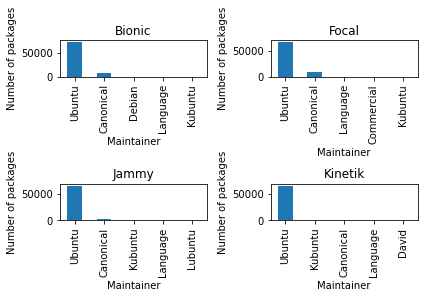

In [13]:
# Most common maintainers for each distro version
df_bionic = df[df['Distro-Version'] == '18.04 - bionic']
df_focal = df[df['Distro-Version'] == '20.04 - focal']
df_jammy = df[df['Distro-Version'] == '22.04 - jammy']
df_kinetik = df[df['Distro-Version'] == '22.10 - kinetic']

# Show 5 most common maintainers for each distro version
print('Most common maintainers for each distro version')
print('Bionic: \n', df_bionic['Maintainer'].value_counts().head(5))
print('Focal: \n', df_focal['Maintainer'].value_counts().head(5))
print('Jammy: \n', df_jammy['Maintainer'].value_counts().head(5))
print('Kinetik: \n', df_kinetik['Maintainer'].value_counts().head(5))

# Plot 5 most common maintainers for each distro version
plt.figure()
plt.subplot(2,2,1)
df_bionic['Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Bionic')
plt.xlabel('Maintainer')
plt.ylabel('Number of packages')
plt.subplot(2,2,2)
df_focal['Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Focal')
plt.xlabel('Maintainer')
plt.ylabel('Number of packages')
plt.subplot(2,2,3)
df_jammy['Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Jammy')
plt.xlabel('Maintainer')
plt.ylabel('Number of packages')
plt.subplot(2,2,4)
df_kinetik['Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Kinetik')
plt.xlabel('Maintainer')
plt.ylabel('Number of packages')
plt.tight_layout()
plt.show()

Ubuntu seems to be the main maintainer of the packages in all versions. Let's see if we obtain the same results looking at the original mantainers.

Most common maintainers for each distro version
Bionic: 
 Debian            44208
Alberto            6336
Cross              4512
Debian/Kubuntu     1234
Mattia              935
Name: Original-Maintainer, dtype: int64
Focal: 
 Debian            45513
Alberto            8899
Cross              3293
Debian/Kubuntu      977
Landscape           332
Name: Original-Maintainer, dtype: int64
Jammy: 
 Debian            47902
Mark               3291
Debian/Kubuntu      442
Sam                 403
Alberto             308
Name: Original-Maintainer, dtype: int64
Kinetik: 
 Debian            48597
Debian/Kubuntu      429
Landscape           350
Matthias            298
Mattias             293
Name: Original-Maintainer, dtype: int64


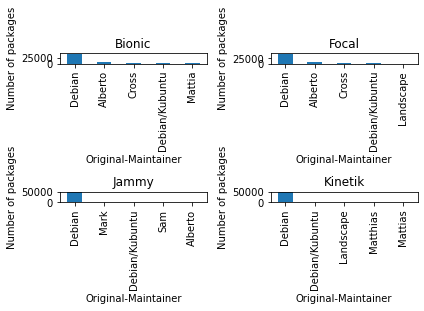

In [14]:
# Most common maintainers for each distro version
df_bionic = df[df['Distro-Version'] == '18.04 - bionic']
df_focal = df[df['Distro-Version'] == '20.04 - focal']
df_jammy = df[df['Distro-Version'] == '22.04 - jammy']
df_kinetik = df[df['Distro-Version'] == '22.10 - kinetic']

# 5 most common maintainers for each distro version
print('Most common maintainers for each distro version')
print('Bionic: \n', df_bionic['Original-Maintainer'].value_counts().head(5))
print('Focal: \n', df_focal['Original-Maintainer'].value_counts().head(5))
print('Jammy: \n', df_jammy['Original-Maintainer'].value_counts().head(5))
print('Kinetik: \n', df_kinetik['Original-Maintainer'].value_counts().head(5))

# Plot 5 most common maintainers for each distro version
plt.figure()
plt.subplot(2,2,1)
df_bionic['Original-Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Bionic')
plt.xlabel('Original-Maintainer')
plt.ylabel('Number of packages')
plt.subplot(2,2,2)
df_focal['Original-Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Focal')
plt.xlabel('Original-Maintainer')
plt.ylabel('Number of packages')
plt.subplot(2,2,3)
df_jammy['Original-Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Jammy')
plt.xlabel('Original-Maintainer')
plt.ylabel('Number of packages')
plt.subplot(2,2,4)
df_kinetik['Original-Maintainer'].value_counts().head(5).plot(kind='bar')
plt.title('Kinetik')
plt.xlabel('Original-Maintainer')
plt.ylabel('Number of packages')
plt.tight_layout()
plt.show()

Now Debian leads the pack, and we have obtained a more diverse set of mantainers.

## Mean

We only have one numerical column, the size of the packages, so we will do some insights on it.

Average number of package size per distro version
Bionic:  7566.0 Kb
Focal:  10707.48 Kb
Jammy:  9188.3 Kb
Kinetik:  5574.99 Kb


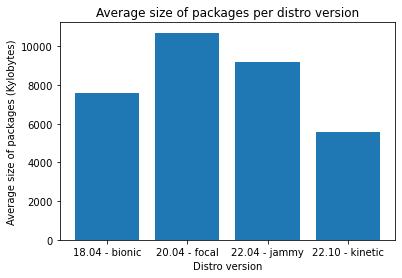

In [27]:
# Average number of package size per distro version (round to 2 decimals)
print('Average number of package size per distro version')
print('Bionic: ', round(df_bionic['Size'].mean()/1000, 2), 'Kb')
print('Focal: ', round(df_focal['Size'].mean()/1000, 2), 'Kb')
print('Jammy: ', round(df_jammy['Size'].mean()/1000, 2), 'Kb')
print('Kinetik: ', round(df_kinetik['Size'].mean()/1000, 2), 'Kb')

# Bar plot the average size of packages, each bar is a distro version
plt.figure()
plt.bar(df['Distro-Version'].unique(), [round(df_bionic['Size'].mean()/1000, 2), round(df_focal['Size'].mean()/1000, 2), round(df_jammy['Size'].mean()/1000, 2), round(df_kinetik['Size'].mean()/1000, 2)])
plt.title('Average size of packages per distro version')
plt.xlabel('Distro version')
plt.ylabel('Average size of packages (Kylobytes)')
plt.show()


In [30]:
# Now we will calculate the standard deviation of the size of packages per distro version
# we know the std is high when the value is close to the mean
print('Standard deviation of the size of packages per distro version')
print('Bionic: ', round(df_bionic['Size'].std()/1000, 2), 'Kb')
print('Focal: ', round(df_focal['Size'].std()/1000, 2), 'Kb')
print('Jammy: ', round(df_jammy['Size'].std()/1000, 2), 'Kb')
print('Kinetik: ', round(df_kinetik['Size'].std()/1000, 2), 'Kb')


Standard deviation of the size of packages per distro version
Bionic:  10490.23 Kb
Focal:  15370.15 Kb
Jammy:  17877.28 Kb
Kinetik:  19148.04 Kb


In the end, the avg size of the packages decreases over time, but the std is quite high.

Average size of packages per distro version after removing the outliers
Bionic:  7151.61 Kb
Focal:  10271.92 Kb
Jammy:  8822.67 Kb
Kinetik:  4678.41 Kb


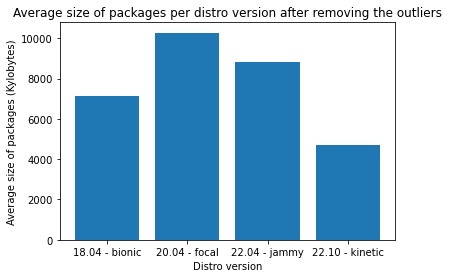

In [32]:
# The mean is very sensitive to outliers, so we will remove the outliers
bionic_mean = df_bionic['Size'].mean()
bionic_std = df_bionic['Size'].std()
df_bionic_new = df_bionic[(df_bionic['Size'] > bionic_mean - 3 * bionic_std) & (df_bionic['Size'] < bionic_mean + 3 * bionic_std)]

focal_mean = df_focal['Size'].mean()
focal_std = df_focal['Size'].std()
df_focal_new = df_focal[(df_focal['Size'] > focal_mean - 3 * focal_std) & (df_focal['Size'] < focal_mean + 3 * focal_std)]

jammy_mean = df_jammy['Size'].mean()
jammy_std = df_jammy['Size'].std()
df_jammy_new = df_jammy[(df_jammy['Size'] > jammy_mean - 3 * jammy_std) & (df_jammy['Size'] < jammy_mean + 3 * jammy_std)]

kinetik_mean = df_kinetik['Size'].mean()
kinetik_std = df_kinetik['Size'].std()
df_kinetik_new = df_kinetik[(df_kinetik['Size'] > kinetik_mean - 3 * kinetik_std) & (df_kinetik['Size'] < kinetik_mean + 3 * kinetik_std)]

# Show the average size of packages per distro version after removing the outliers
print('Average size of packages per distro version after removing the outliers')
print('Bionic: ', round(df_bionic_new['Size'].mean()/1000, 2), 'Kb')
print('Focal: ', round(df_focal_new['Size'].mean()/1000, 2), 'Kb')
print('Jammy: ', round(df_jammy_new['Size'].mean()/1000, 2), 'Kb')
print('Kinetik: ', round(df_kinetik_new['Size'].mean()/1000, 2), 'Kb')

# Bar plot the average size of packages, each bar is a distro version
plt.figure()
plt.bar(df['Distro-Version'].unique(), [round(df_bionic_new['Size'].mean()/1000, 2), round(df_focal_new['Size'].mean()/1000, 2), round(df_jammy_new['Size'].mean()/1000, 2), round(df_kinetik_new['Size'].mean()/1000, 2)])
plt.title('Average size of packages per distro version after removing the outliers')
plt.xlabel('Distro version')
plt.ylabel('Average size of packages (Kylobytes)')
plt.show()

The results are quite similar to the ones obtained with all the data, so the original approach was correct.

## Contingency Tables

Given our columns, we can obtain some contingency tables to see the relations between them.

In [37]:
# Relation between the Year and the Version of the distro
contingency_table = pd.crosstab(df["Distro-Version"], df["Distro-Year"])

print(contingency_table)

Distro-Year       2018   2020   2022
Distro-Version                      
18.04 - bionic   80637      0      0
20.04 - focal        0  78480      0
22.04 - jammy        0      0  71556
22.10 - kinetic      0      0  69055


We can clearly see above that each version corresponds to a single year, and that the first number of the version is the year.

In [38]:
# Relation between the priority and the architecture
contingency_table = pd.crosstab(df["Architecture"], df["Priority"])

print(contingency_table)

Priority      extra  important  optional  required  standard
Architecture                                                
all           20053        100    108361        35        79
amd64         24271        414    145803       275       337


Most of the required packages are only avaliable in amd64

In [39]:
# Average size of packages for each combination of priority and essential status

# group the data by priority and essential status, and calculate the average size
grouped_data = df.groupby(["Priority", "Essential"]).mean()["Size"]

# create the contingency table
contingency_table = pd.pivot_table(grouped_data.reset_index(), values="Size", index="Priority", columns="Essential")

# print the table
print(contingency_table)

Essential             no           yes
Priority                              
extra      159028.363636  1.758669e+06
important  369332.333333  3.737072e+05
optional   554374.252747  2.995741e+06
required             NaN  2.453816e+05
standard   577102.000000  1.812551e+05


This table shows that the size of packages is strongly correlated with their priority and essential status. Essential packages tend to be larger than non-essential packages, and optional packages tend to be the largest packages overall. However, there are some exceptions to these trends, such as the relatively small size of extra packages.

Also, another clear conclusion is that required packages are always marked as essential.


## Missing values
Now we will identify missing values and evaluate the impact on the dataset

In [5]:
columns = ["Distro-Version", "Distro-Year", "Package", "Description", "Section", "Version", "Architecture", "Priority", "Essential", "Build-Essential",
             "Maintainer", "Original-Maintainer", "Size", "Installed-Size", "Depends", "Pre-Depends", "Recommends", "Conflicts", "Suggests", "Replaces", "Provides"]

for column in columns:
    missing = df[column].isna().sum()
    print(f"{column}: {missing} missing values ({round(missing/len(df[column])*100, 2)}%)")

Distro-Version: 0 missing values (0.0%)
Distro-Year: 0 missing values (0.0%)
Package: 0 missing values (0.0%)
Description: 0 missing values (0.0%)
Section: 0 missing values (0.0%)
Version: 1 missing values (0.0%)
Architecture: 0 missing values (0.0%)
Priority: 0 missing values (0.0%)
Essential: 0 missing values (0.0%)
Build-Essential: 0 missing values (0.0%)
Maintainer: 0 missing values (0.0%)
Original-Maintainer: 0 missing values (0.0%)
Size: 0 missing values (0.0%)
Installed-Size: 0 missing values (0.0%)
Depends: 0 missing values (0.0%)
Pre-Depends: 80 missing values (0.03%)
Recommends: 6 missing values (0.0%)
Conflicts: 21 missing values (0.01%)
Suggests: 13 missing values (0.0%)
Replaces: 25 missing values (0.01%)
Provides: 31 missing values (0.01%)


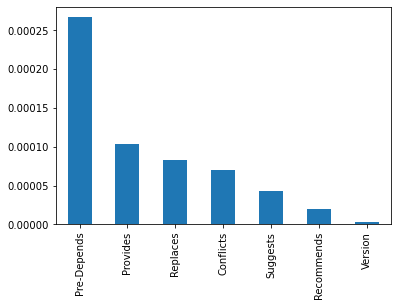

In [12]:
# create histogram for percentage of missing values
missing = df.isna().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing = missing/len(df)
missing.plot.bar()
plt.show()

We can see that there are very little missing values in the dataset, so there will be very little impact on the dataset

In [6]:
# See if there are any rows that are missing all values
missing_rows = []
for index, row in df.iterrows():
    missing = True
    for column in columns:
        if not pd.isna(row[column]):
            missing = False
    if missing:
        missing_rows.append(index)
    
print(f"{len(missing_rows)} rows are missing all values")

0 rows are missing all values
